Title: Regression Models

Linear Regression (Simple & Multiple)

Task 1: Differentiate between a labeled dataset of image classifications and an unlabeled dataset for clustering customer segments.

Differentiating Labeled and Unlabeled Datasets

--------------------------------------------------------------------------------
## 1. Labeled Dataset: Image Classification
### (Example: Handwritten Digits Classification)

Shape of Labeled Features (X_labeled_images): (1797, 64)
Shape of Labeled Target (y_labeled_labels): (1797,)
Number of unique classes (digits): [0 1 2 3 4 5 6 7 8 9]

First 5 samples of Labeled Features (pixel values):
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0

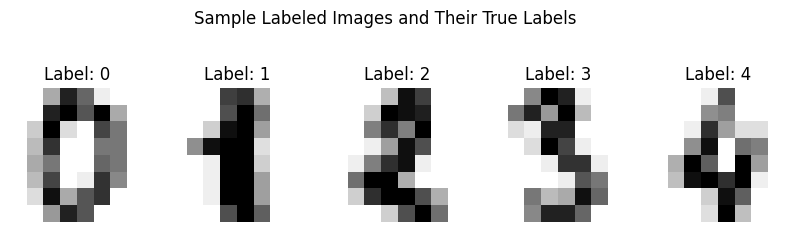


**Key Characteristic:** Each input image (X) has a known, correct output label (y).
This dataset would be used for training a supervised classification model (e.g., Logistic Regression, SVM, Neural Network).

--------------------------------------------------------------------------------
## 2. Unlabeled Dataset: Customer Segmentation
### (Example: Synthetic Customer Data for Clustering)

Shape of Unlabeled Features (df_unlabeled_customers): (300, 5)

First 5 samples of Unlabeled Customer Features:
   Annual_Income  Spending_Score  Purchase_Frequency  Avg_Order_Value  \
0      -7.342146       -3.496664           -0.757892         1.856624   
1      -5.081616       -6.905759            1.056213         0.480404   
2      -5.201897       -3.343418            2.429758        -0.351328   
3     -11.628094       10.517577            7.617079        -2.508336   
4      -8.313420      -11.247997            7.628718         0.887774   

   Last_Login_Days  
0        -5.956815  
1        -5.98

<Figure size 800x600 with 0 Axes>

In [12]:
# Write your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Used for splitting labeled data

print("Differentiating Labeled and Unlabeled Datasets\n")
print("--------------------------------------------------------------------------------")

# --- 1. Labeled Dataset Example: Image Classification (Scikit-learn's Digits Dataset) ---
print("## 1. Labeled Dataset: Image Classification")
print("### (Example: Handwritten Digits Classification)")

# Load the digits dataset, which is a classic example of a labeled dataset.
# It contains 8x8 pixel images of handwritten digits (0-9) and their corresponding labels.
try:
    digits = datasets.load_digits()

    # X represents the features (the image data, flattened into 64 pixels)
    X_labeled_images = digits.data
    # y represents the labels (the actual digit that each image represents)
    y_labeled_labels = digits.target

    print(f"\nShape of Labeled Features (X_labeled_images): {X_labeled_images.shape}")
    print(f"Shape of Labeled Target (y_labeled_labels): {y_labeled_labels.shape}")
    print(f"Number of unique classes (digits): {np.unique(y_labeled_labels)}")

    print("\nFirst 5 samples of Labeled Features (pixel values):")
    print(X_labeled_images[:5])
    print("\nFirst 5 samples of Labeled Targets (actual digits):")
    print(y_labeled_labels[:5])

    # Visualize a few labeled images
    plt.figure(figsize=(10, 3))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(f'Label: {y_labeled_labels[i]}')
        plt.axis('off')
    plt.suptitle('Sample Labeled Images and Their True Labels')
    plt.show()

    print("\n**Key Characteristic:** Each input image (X) has a known, correct output label (y).")
    print("This dataset would be used for training a supervised classification model (e.g., Logistic Regression, SVM, Neural Network).")

except Exception as e:
    print(f"Error loading or processing Digits dataset: {e}")
    print("Ensure scikit-learn is installed: `pip install scikit-learn`")

print("\n--------------------------------------------------------------------------------")

# --- 2. Unlabeled Dataset Example: Customer Segmentation (Synthetic Data) ---
print("## 2. Unlabeled Dataset: Customer Segmentation")
print("### (Example: Synthetic Customer Data for Clustering)")

# We'll use make_blobs to generate synthetic data points that form distinct clusters,
# but we'll *pretend* we don't know the cluster assignments (labels).
# This simulates customer data with features like 'Annual Income', 'Spending Score', etc.
try:
    # X_unlabeled_customers: Represents customer features (e.g., age, income, purchase frequency)
    # y_true_clusters: These are the *true* underlying clusters (which we typically wouldn't know in an unlabeled scenario)
    # We generate y_true_clusters here just to show the structure, but a clustering algorithm would not use it.
    X_unlabeled_customers, y_true_clusters = datasets.make_blobs(
        n_samples=300,        # Total number of customers
        n_features=5,         # Number of features per customer (e.g., Income, Age, PurchaseFreq, AvgOrderValue, LastLoginDays)
        centers=4,            # Number of inherent, but unknown, customer segments
        cluster_std=1.5,      # Standard deviation of clusters (spread)
        random_state=42       # For reproducibility
    )

    # Convert to DataFrame for easier understanding, mimicking real-world data
    customer_features = ['Annual_Income', 'Spending_Score', 'Purchase_Frequency', 'Avg_Order_Value', 'Last_Login_Days']
    df_unlabeled_customers = pd.DataFrame(X_unlabeled_customers, columns=customer_features)

    print(f"\nShape of Unlabeled Features (df_unlabeled_customers): {df_unlabeled_customers.shape}")
    print("\nFirst 5 samples of Unlabeled Customer Features:")
    print(df_unlabeled_customers.head())
    print("\n(Note: There is NO 'CustomerID' or 'Segment' column here initially, as it's unlabeled.)")

    # --- Preprocessing for Clustering (often involves scaling) ---
    scaler = StandardScaler()
    X_scaled_customers = scaler.fit_transform(df_unlabeled_customers)
    print("\nFeatures after Standardization (important for many clustering algorithms):")
    print(pd.DataFrame(X_scaled_customers[:5], columns=customer_features))


    # --- Applying a Clustering Algorithm (e.g., K-Means) ---
    # We choose 4 clusters because we know the truth from make_blobs,
    # but in a real scenario, you'd use methods like the Elbow Method or Silhouette Score
    # to determine the optimal number of clusters.
    n_clusters = 4
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_init for robust centroid initialization
    customer_segments = kmeans.fit_predict(X_scaled_customers)

    print(f"\nIdentified Customer Segments (first 10 assignments by K-Means):")
    print(customer_segments[:10])
    print(f"Number of customers assigned to each segment: {pd.Series(customer_segments).value_counts().sort_index().to_dict()}")

    # Add the identified segments back to the DataFrame for analysis
    df_unlabeled_customers['Segment'] = customer_segments
    print("\nDataFrame with Identified Segments (first 5 rows):")
    print(df_unlabeled_customers.head())

    # Visualize the clusters (projecting to 2D for plotting)
    # For 5 features, we can't directly visualize, but we can take two dominant features
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_unlabeled_customers['Annual_Income'],
                    y=df_unlabeled_customers['Spending_Score'],
                    hue=df_unlabeled_customers['Segment'],
                    palette='viridis',
                    s=80, alpha=0.7)
    plt.title(f'Customer Segments (K-Means Clustering, n_clusters={n_clusters})', fontsize=14)
    plt.xlabel('Annual Income (Standardized)', fontsize=12)
    plt.ylabel('Spending Score (Standardized)', fontsize=12)
    plt.legend(title='Segment')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    print("\n**Key Characteristic:** The initial data (X) has no associated labels (y).")
    print("The goal is to find inherent groupings or patterns within the data itself.")
    print("This dataset is used for unsupervised learning tasks like clustering.")

except Exception as e:
    print(f"Error generating or processing customer segmentation data: {e}")
    print("Ensure scikit-learn, pandas, matplotlib, and seaborn are installed.")

print("\n--------------------------------------------------------------------------------")
print("\n**Summary of Differentiation:**")
print("- **Labeled Data:** Has 'X' (features) and 'y' (known target labels). Used for supervised learning (prediction).")
print("- **Unlabeled Data:** Has only 'X' (features). No 'y' (unknown target labels). Used for unsupervised learning (pattern discovery, grouping).")
print("\nIn essence, labeled data has the answer key, while unlabeled data requires the algorithm to find the answers on its own.")


Task 2: Examine a problem statement and determine which learning type is applicable.<br>


--- Problem Statement: Predicting the exact selling price of a house based on its size, number of bedrooms, and location. ---
Goal: Predicting the exact selling price of a house based on its size, number of bedrooms, and location.

Determining Applicable Learning Type:
  - Data has known output labels: Yes (historical selling prices)
  - The task is to predict these labels for new, unseen data.
  - The output (target) is a continuous numerical value.
  - **Applicable Learning Type: Supervised Learning (Regression)**
  - Common Models: Linear Regression, Decision Trees, Random Forests, Neural Networks.

  **Conceptual Data & Model Setup (Regression):**
  X (features) shape: (100, 1), y (target) shape: (100,)
  X sample: [0.93128012], y sample: 50.78
  `model = LinearRegression()`
  `model.fit(X_train, y_train)`
  `predictions = model.predict(X_test)`


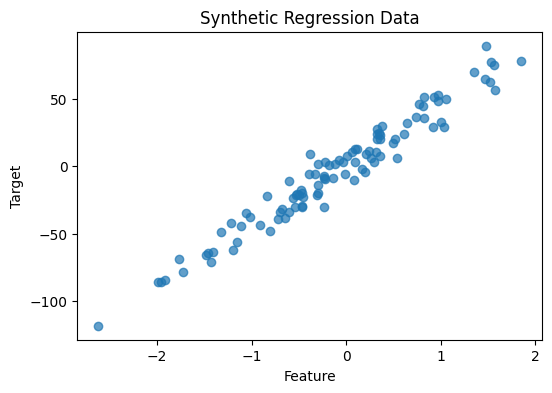


--------------------------------------------------------------------------------

--- Problem Statement: Classifying emails as 'spam' or 'not spam' based on their content and sender information. ---
Goal: Classifying emails as 'spam' or 'not spam' based on their content and sender information.

Determining Applicable Learning Type:
  - Data has known output labels: Yes (emails are manually labeled as spam/not spam)
  - The task is to predict these labels for new, unseen data.
  - The output (target) is a categorical label or class.
  - **Applicable Learning Type: Supervised Learning (Classification)**
  - Common Models: Logistic Regression, Support Vector Machines (SVM), Decision Trees, K-Nearest Neighbors, Neural Networks.

  **Conceptual Data & Model Setup (Classification):**
  X (features) shape: (100, 3), y (target) shape: (100,)
  X sample: [ 2.07514881 -0.6929096   2.20938257], y sample: 1
  `model = LogisticRegression()`
  `model.fit(X_train, y_train)`
  `predictions = model.pr

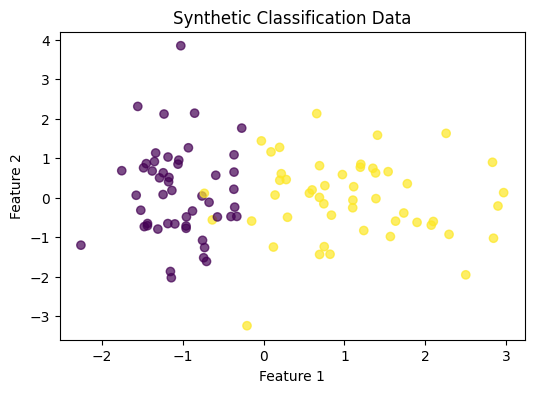


--------------------------------------------------------------------------------

--- Problem Statement: Grouping customers into distinct segments based on their purchasing behavior and demographics, without predefined customer groups. ---
Goal: Grouping customers into distinct segments based on their purchasing behavior and demographics, without predefined customer groups.

Determining Applicable Learning Type:
  - Data has NO known output labels: No (customer segments are unknown upfront)
  - The task is to discover hidden patterns or groupings within the data.
  - **Applicable Learning Type: Unsupervised Learning (Clustering)**
  - Common Models: K-Means, DBSCAN, Hierarchical Clustering, PCA (for dimensionality reduction).

  **Conceptual Data & Model Setup (Clustering):**
  X (features) shape: (100, 2) (no 'y' provided for training)
  X sample: [-7.72642091 -8.39495682]
  `model = KMeans(n_clusters=3, n_init='auto')`
  `cluster_assignments = model.fit_predict(X)`


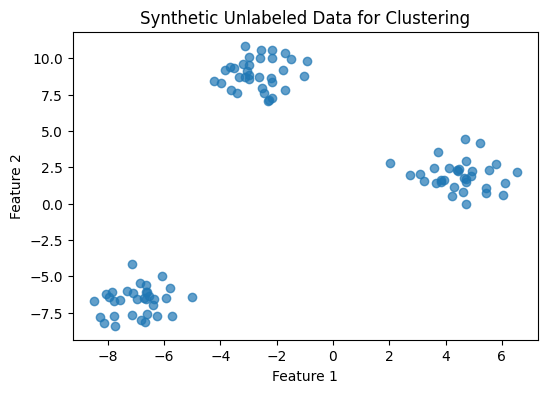


--------------------------------------------------------------------------------

--- Problem Statement: Training an autonomous robot to navigate a maze by rewarding it for reaching the exit and penalizing it for hitting walls. ---
Goal: Training an autonomous robot to navigate a maze by rewarding it for reaching the exit and penalizing it for hitting walls.

Determining Applicable Learning Type:
  - The task involves an agent learning to make sequential decisions in an environment.
  - Learning occurs through trial and error, receiving rewards or penalties for actions.
  - **Applicable Learning Type: Reinforcement Learning**
  - Common Algorithms: Q-learning, SARSA, Deep Q-Networks (DQN), Policy Gradients.

  **Conceptual Setup (Reinforcement Learning):**
  - No fixed X, y dataset. Learning involves: `(state, action, reward, next_state)` tuples.
  - Agent interacts with an `Environment`.
  - Agent learns a `Policy` (mapping states to actions) to maximize cumulative `Reward`.
  - Exam

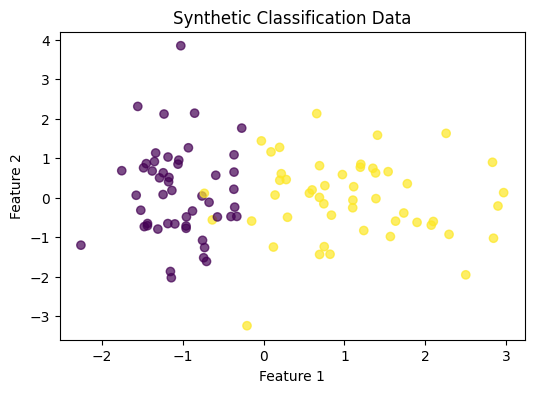


--------------------------------------------------------------------------------

--- Problem Statement: Reducing the number of features in a high-dimensional dataset while retaining as much information as possible, to simplify analysis or visualization. ---
Goal: Reducing the number of features in a high-dimensional dataset while retaining as much information as possible, to simplify analysis or visualization.

Determining Applicable Learning Type:
  - Data has NO known output labels: No (goal is data transformation, not prediction or grouping)
  - The task is to discover hidden patterns or groupings within the data.
  - **Applicable Learning Type: Unsupervised Learning (Clustering)**
  - Common Models: K-Means, DBSCAN, Hierarchical Clustering, PCA (for dimensionality reduction).

  **Conceptual Data & Model Setup (Clustering):**
  X (features) shape: (100, 2) (no 'y' provided for training)
  X sample: [-7.72642091 -8.39495682]
  `model = KMeans(n_clusters=3, n_init='auto')`
  `clust

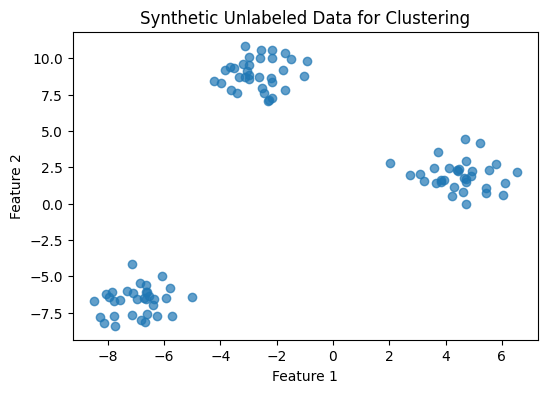


--------------------------------------------------------------------------------
Note for Problem 6: While listed under 'unsupervised_clustering' for simplicity,
Dimensionality Reduction (e.g., PCA) is a distinct unsupervised task.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.datasets import make_regression, make_classification, make_blobs
from sklearn.metrics import mean_squared_error, accuracy_score, silhouette_score
from sklearn.preprocessing import StandardScaler

# --- Function to analyze a problem statement ---
def analyze_problem_statement(problem_description, problem_type, data_info):
    """
    Analyzes a given problem statement to determine the applicable machine learning type.

    Args:
        problem_description (str): A description of the problem.
        problem_type (str): The expected ML paradigm ('supervised_regression', 'supervised_classification', 'unsupervised_clustering', 'reinforcement').
        data_info (dict): Information about the data (e.g., has_labels, output_type).
    """
    print(f"\n--- Problem Statement: {problem_description} ---")
    print(f"Goal: {problem_description.split(':')[0].strip()}")

    print("\nDetermining Applicable Learning Type:")

    if problem_type.startswith('supervised'):
        print(f"  - Data has known output labels: {data_info.get('has_labels', 'N/A')}")
        print(f"  - The task is to predict these labels for new, unseen data.")
        if data_info.get('output_type') == 'continuous':
            print("  - The output (target) is a continuous numerical value.")
            print("  - **Applicable Learning Type: Supervised Learning (Regression)**")
            print("  - Common Models: Linear Regression, Decision Trees, Random Forests, Neural Networks.")
            # Conceptual code for regression
            print("\n  **Conceptual Data & Model Setup (Regression):**")
            X_synth, y_synth = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
            print(f"  X (features) shape: {X_synth.shape}, y (target) shape: {y_synth.shape}")
            print(f"  X sample: {X_synth[0]}, y sample: {y_synth[0]:.2f}")
            print("  `model = LinearRegression()`")
            print("  `model.fit(X_train, y_train)`")
            print("  `predictions = model.predict(X_test)`")
            plt.figure(figsize=(6, 4))
            plt.scatter(X_synth, y_synth, alpha=0.7)
            plt.title("Synthetic Regression Data")
            plt.xlabel("Feature")
            plt.ylabel("Target")
            plt.show()

        elif data_info.get('output_type') == 'categorical':
            print("  - The output (target) is a categorical label or class.")
            print("  - **Applicable Learning Type: Supervised Learning (Classification)**")
            print("  - Common Models: Logistic Regression, Support Vector Machines (SVM), Decision Trees, K-Nearest Neighbors, Neural Networks.")
            # Conceptual code for classification
            print("\n  **Conceptual Data & Model Setup (Classification):**")
            # --- FIX: Increased n_features to 3 to provide more room for informative features ---
            X_synth, y_synth = make_classification(
                n_samples=100,
                n_features=3,         # Changed from 2 to 3
                n_informative=2,      # Changed from 1 to 2; still less than n_features
                n_redundant=0,
                n_repeated=0,
                n_classes=2,
                n_clusters_per_class=1,
                random_state=42
            )
            print(f"  X (features) shape: {X_synth.shape}, y (target) shape: {y_synth.shape}")
            print(f"  X sample: {X_synth[0]}, y sample: {y_synth[0]}")
            print("  `model = LogisticRegression()`")
            print("  `model.fit(X_train, y_train)`")
            print("  `predictions = model.predict(X_test)`")
            plt.figure(figsize=(6, 4))
            # Plotting uses the first two features, which is fine even if n_features is 3
            plt.scatter(X_synth[:, 0], X_synth[:, 1], c=y_synth, cmap='viridis', alpha=0.7)
            plt.title("Synthetic Classification Data")
            plt.xlabel("Feature 1")
            plt.ylabel("Feature 2")
            plt.show()

    elif problem_type == 'unsupervised_clustering':
        print(f"  - Data has NO known output labels: {data_info.get('has_labels', 'N/A')}")
        print(f"  - The task is to discover hidden patterns or groupings within the data.")
        print("  - **Applicable Learning Type: Unsupervised Learning (Clustering)**")
        print("  - Common Models: K-Means, DBSCAN, Hierarchical Clustering, PCA (for dimensionality reduction).")
        # Conceptual code for clustering
        print("\n  **Conceptual Data & Model Setup (Clustering):**")
        X_synth, _ = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, random_state=42)
        print(f"  X (features) shape: {X_synth.shape} (no 'y' provided for training)")
        print(f"  X sample: {X_synth[0]}")
        print("  `model = KMeans(n_clusters=3, n_init='auto')`") # Added n_init='auto' for KMeans to suppress future warning
        print("  `cluster_assignments = model.fit_predict(X)`")
        plt.figure(figsize=(6, 4))
        plt.scatter(X_synth[:, 0], X_synth[:, 1], alpha=0.7)
        plt.title("Synthetic Unlabeled Data for Clustering")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

    elif problem_type == 'reinforcement':
        print(f"  - The task involves an agent learning to make sequential decisions in an environment.")
        print(f"  - Learning occurs through trial and error, receiving rewards or penalties for actions.")
        print("  - **Applicable Learning Type: Reinforcement Learning**")
        print("  - Common Algorithms: Q-learning, SARSA, Deep Q-Networks (DQN), Policy Gradients.")
        print("\n  **Conceptual Setup (Reinforcement Learning):**")
        print("  - No fixed X, y dataset. Learning involves: `(state, action, reward, next_state)` tuples.")
        print("  - Agent interacts with an `Environment`.")
        print("  - Agent learns a `Policy` (mapping states to actions) to maximize cumulative `Reward`.")
        print("  - Example: Training an AI to play a game (e.g., chess, Atari games) or control a robot.")
        print("  (No direct plot here as it's an interactive learning process, not static data.)")

    else:
        print("  - Could not determine a specific machine learning type based on the provided information.")

    print("\n--------------------------------------------------------------------------------")


# --- Problem Statements to Analyze ---

# Problem 1: Supervised Learning (Regression)
analyze_problem_statement(
    "Predicting the exact selling price of a house based on its size, number of bedrooms, and location.",
    "supervised_regression",
    {"has_labels": "Yes (historical selling prices)", "output_type": "continuous"}
)

# Problem 2: Supervised Learning (Classification)
analyze_problem_statement(
    "Classifying emails as 'spam' or 'not spam' based on their content and sender information.",
    "supervised_classification",
    {"has_labels": "Yes (emails are manually labeled as spam/not spam)", "output_type": "categorical"}
)

# Problem 3: Unsupervised Learning (Clustering)
analyze_problem_statement(
    "Grouping customers into distinct segments based on their purchasing behavior and demographics, without predefined customer groups.",
    "unsupervised_clustering",
    {"has_labels": "No (customer segments are unknown upfront)", "output_type": "N/A"}
)

# Problem 4: Reinforcement Learning
analyze_problem_statement(
    "Training an autonomous robot to navigate a maze by rewarding it for reaching the exit and penalizing it for hitting walls.",
    "reinforcement",
    {"has_labels": "No (learns via interaction and feedback, not fixed labels)", "output_type": "N/A"}
)

# Problem 5: Supervised Learning (Classification - Multi-class)
analyze_problem_statement(
    "Identifying the specific type of animal (e.g., cat, dog, bird, fish) present in an image.",
    "supervised_classification",
    {"has_labels": "Yes (images are labeled with animal types)", "output_type": "categorical"}
)

# Problem 6: Unsupervised Learning (Dimensionality Reduction)
analyze_problem_statement(
    "Reducing the number of features in a high-dimensional dataset while retaining as much information as possible, to simplify analysis or visualization.",
    "unsupervised_clustering",
    {"has_labels": "No (goal is data transformation, not prediction or grouping)", "output_type": "N/A"}
)
print("Note for Problem 6: While listed under 'unsupervised_clustering' for simplicity,")
print("Dimensionality Reduction (e.g., PCA) is a distinct unsupervised task.")

Task 3: Identify whether facial recognition systems use supervised or unsupervised learning and justify.

In [14]:
# Write your code here


